In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 1.웹페이지 크롤링

## 1.1 BeautifulSoup 설치하기 : HTML 파싱 라이브러리

In [ ]:
#!pip install beautifulsoup4

## 1.2 네이버 영화 리뷰 크롤링하기

In [2]:
from bs4 import BeautifulSoup
import urllib.request

f = open('./data/movie_reviews.txt', 'w', encoding='UTF-8')

for no in range(1, 501):
    url = 'https://movie.naver.com/movie/point/af/list.naver?&page=%d' % no
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')

    reviews = soup.select('tbody > tr > td.title')
    for rev in reviews: 
        rev_lst = []
        title = rev.select_one('a.movie').text.strip()
        score = rev.select_one('div.list_netizen_score > em').text.strip()
        comment = rev.select_one('br').next_sibling.strip()
        
        # 긍정/부정 리뷰 구분하기
        if int(score) >= 8 :
            label = 1   # 긍정 리뷰 (8~10점)
        elif int(score) <= 4 :
            label = 0   # 부정 리뷰 (0~4점)
        else :
            label = 2   
        
        f.write(f'{title}\t{score}\t{comment}\t{label}\n')
f.close()

## 1.3 크롤링한 txt 파일을 csv로 읽기

In [3]:
import pandas as pd
data = pd.read_csv('./data/movie_reviews.txt', delimiter = '\t', names=['title', 'score', 'comment', 'label'])
df_data = pd.DataFrame(data)
df_data.head(10)

,title,score,comment,label
0,샹치와 텐 링즈의 전설,5,어머니와 아버지가 죽는걸 보고만 있는 방관자 샹치,2
1,안녕 베일리,6,NaN,2
2,해적: 도깨비 깃발,6,그냥 뭐.. 저냥 뭐... 유쾌한 영화로 보이기 위한 노력?,2
3,카고,10,호러와 아기의 귀여움을 동시에 보게 해준 감독 천재ㅋㅋ,1
4,해적: 도깨비 깃발,2,이렇게 영화를 못 만들수 있구나 라는 생각과 발연기가 무엇인지 제대로 보여 준 영화,0
5,해적: 도깨비 깃발,4,"CG 때문에 별 두개줌. 모든게 불호였으나, 마지막 파도씬은 끝내주더라!",0
6,킹메이커,9,"연기력과 미장센과 ost와 편집, 연출 모든것이 매력적이다. 조금만 더 깊이 주제를...",1
7,킹메이커,10,NaN,1
8,에이리언 2,10,말해.무엇하리 내인생 최고 명작이다 에일리언스는.,1
9,킹메이커,7,생각보다 재밌었습니다아!!,2


# 2. 통계 분석

## 2.1 데이터 탐색

In [4]:
# 전체 리뷰 수 확인하기
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5000 non-null   object
 1   score    5000 non-null   int64 
 2   comment  4682 non-null   object
 3   label    5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [5]:
# 누락된 데이터(NaN) 골라내기
df_reviews = df_data.dropna()
# 중복된 리뷰 제거하기
df_reviews = df_reviews.drop_duplicates(['comment'])

df_reviews.info()
df_reviews.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4644 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4644 non-null   object
 1   score    4644 non-null   int64 
 2   comment  4644 non-null   object
 3   label    4644 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 181.4+ KB


,title,score,comment,label
0,샹치와 텐 링즈의 전설,5,어머니와 아버지가 죽는걸 보고만 있는 방관자 샹치,2
2,해적: 도깨비 깃발,6,그냥 뭐.. 저냥 뭐... 유쾌한 영화로 보이기 위한 노력?,2
3,카고,10,호러와 아기의 귀여움을 동시에 보게 해준 감독 천재ㅋㅋ,1
4,해적: 도깨비 깃발,2,이렇게 영화를 못 만들수 있구나 라는 생각과 발연기가 무엇인지 제대로 보여 준 영화,0
5,해적: 도깨비 깃발,4,"CG 때문에 별 두개줌. 모든게 불호였으나, 마지막 파도씬은 끝내주더라!",0
6,킹메이커,9,"연기력과 미장센과 ost와 편집, 연출 모든것이 매력적이다. 조금만 더 깊이 주제를...",1
8,에이리언 2,10,말해.무엇하리 내인생 최고 명작이다 에일리언스는.,1
9,킹메이커,7,생각보다 재밌었습니다아!!,2
10,특송,6,아역배우 트름 너무 거슬렸어요,2
11,매트릭스: 리저렉션,1,이거는 매트릭스가 아니다,0


In [6]:
# 영화 리스트 확인하기
movie_lst = df_reviews.title.unique()
print('전체 영화 편수 =', len(movie_lst))
print(movie_lst[:10])

전체 영화 편수 = 1329
['샹치와 텐 링즈의 전설' '해적: 도깨비 깃발' '카고' '킹메이커' '에이리언 2' '특송' '매트릭스: 리저렉션'
 '아메리칸 뷰티' '스파이더맨: 노 웨이 홈' '귀향']


In [7]:
# 각 영화의 리뷰수 계산하기
cnt_movie = df_reviews.title.value_counts() 
cnt_movie[:20]

해적: 도깨비 깃발             691
킹메이커                   404
특송                     352
씽2게더                   134
경관의 피                  117
스파이더맨: 노 웨이 홈          114
강릉                      52
돈 룩 업                   49
이터널스                    41
기적                      40
모가디슈                    38
하우스 오브 구찌               37
어나더 라운드                 33
13시간                    20
엔칸토: 마법의 세계             19
극장판 안녕 자두야: 제주도의 비밀     18
매트릭스: 리저렉션              17
웨스트 사이드 스토리             16
듄                       16
사냥의 시간                  15
Name: title, dtype: int64

In [8]:
# 각 영화의 평점 분석하기
info_movie = df_reviews.groupby('title')['score'].describe()
info_movie.sort_values(by=['count'], axis=0, ascending=False)

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
해적: 도깨비 깃발,691.0,5.545586,3.811750,1.0,1.0,6.0,10.0,10.0
킹메이커,404.0,7.460396,3.284057,1.0,6.0,9.0,10.0,10.0
특송,352.0,5.619318,3.352504,1.0,2.0,6.0,9.0,10.0
씽2게더,134.0,9.343284,1.641128,1.0,10.0,10.0,10.0,10.0
경관의 피,117.0,6.931624,2.961612,1.0,5.0,8.0,10.0,10.0
...,...,...,...,...,...,...,...,...
센스 앤 센서빌리티,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
셜록: 유령신부,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0
셰인,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0


In [9]:
# 긍정, 부정 리뷰 확인하기
df_reviews.label.value_counts()

1    2921
0    1089
2     634
Name: label, dtype: int64

## 2.2 데이터 시각화하기

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunsl.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#그래프에서 마이너스 기호가 표시되도록 하는 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

### 2.2.1 리뷰 수가 많은 상위 10개 영화 추출하기

In [11]:
# 리뷰 수가 많은 상위 10개 영화 추출하기
top10 = df_reviews.title.value_counts().sort_values(ascending=False)[:10]
top10_title = top10.index.tolist()
top10_reviews = df_reviews[df_reviews['title'].isin(top10_title)]

print(top10_title)
print(top10_reviews.info())

['해적: 도깨비 깃발', '킹메이커', '특송', '씽2게더', '경관의 피', '스파이더맨: 노 웨이 홈', '강릉', '돈 룩 업', '이터널스', '기적']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 4998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1994 non-null   object
 1   score    1994 non-null   int64 
 2   comment  1994 non-null   object
 3   label    1994 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 77.9+ KB
None


### 2.2.2 리뷰 수가 많은 상위 10개 영화에 대하여 평점 확인하기

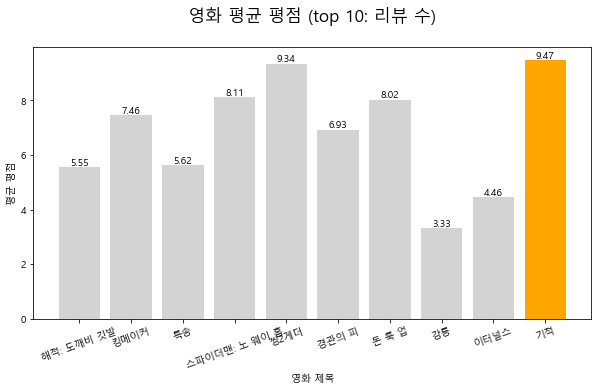

In [12]:
# 각 영화의 평점 평균 계산하기
import numpy as np
movie_title = top10_reviews.title.unique().tolist()    # 영화 제목 추출
avg_score = {}  # {제목 : 평균} 저장하기
for t in movie_title:
    avg = top10_reviews[top10_reviews['title'] == t]['score'].mean()
    avg_score[t] = avg

plt.figure(figsize=(10, 5))
plt.title('영화 평균 평점 (top 10: 리뷰 수)\n', fontsize=17)
plt.xlabel('영화 제목')
plt.ylabel('평균 평점')
plt.xticks(rotation=20)

for x, y in avg_score.items():
    color = np.array_str(np.where(y == max(avg_score.values()), 'orange', 'lightgrey'))    
    plt.bar(x, y, color=color)
    plt.text(x, y, '%.2f' % y, 
             horizontalalignment='center',  
             verticalalignment='bottom')    

plt.show()

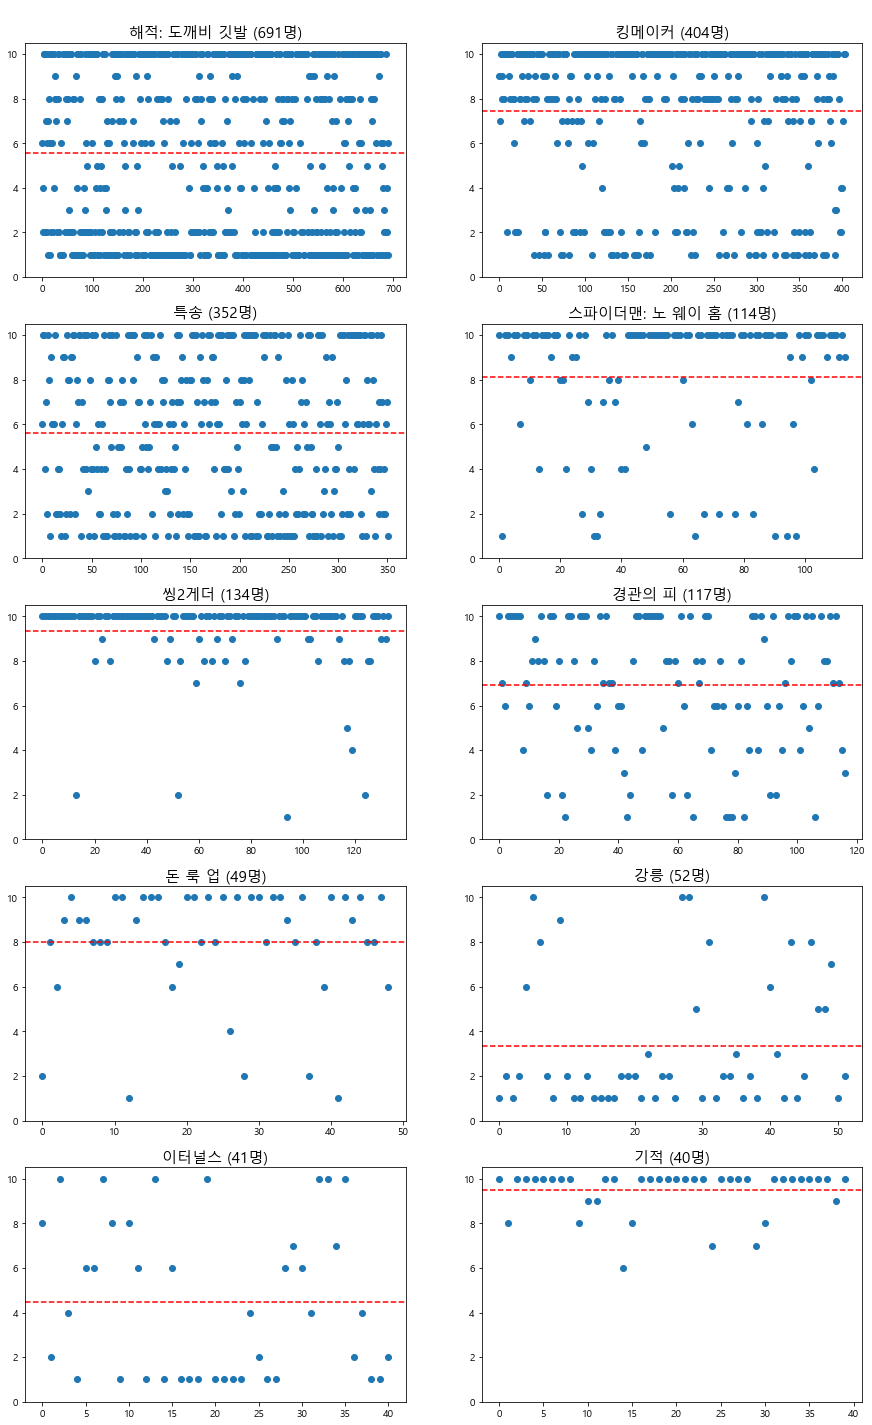

In [13]:
# 각 영화의 평점 분포도 확인하기
import math
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
axs = axs.flatten()

for title, avg, ax in zip(avg_score.keys(), avg_score.values(), axs):    
    num_reviews = len(top10_reviews[top10_reviews['title'] == title])   
    x = np.arange(num_reviews)
    y = top10_reviews[top10_reviews['title'] == title]['score']
    ax.set_title('\n%s (%d명)' % (title, num_reviews) , fontsize=15)
    ax.set_ylim(0, 10.5, 2)
    # 평점 
    ax.plot(x, y, 'o')    
    # 평균 그래프 추가
    ax.axhline(avg, color='red', linestyle='--')    
    
plt.show()

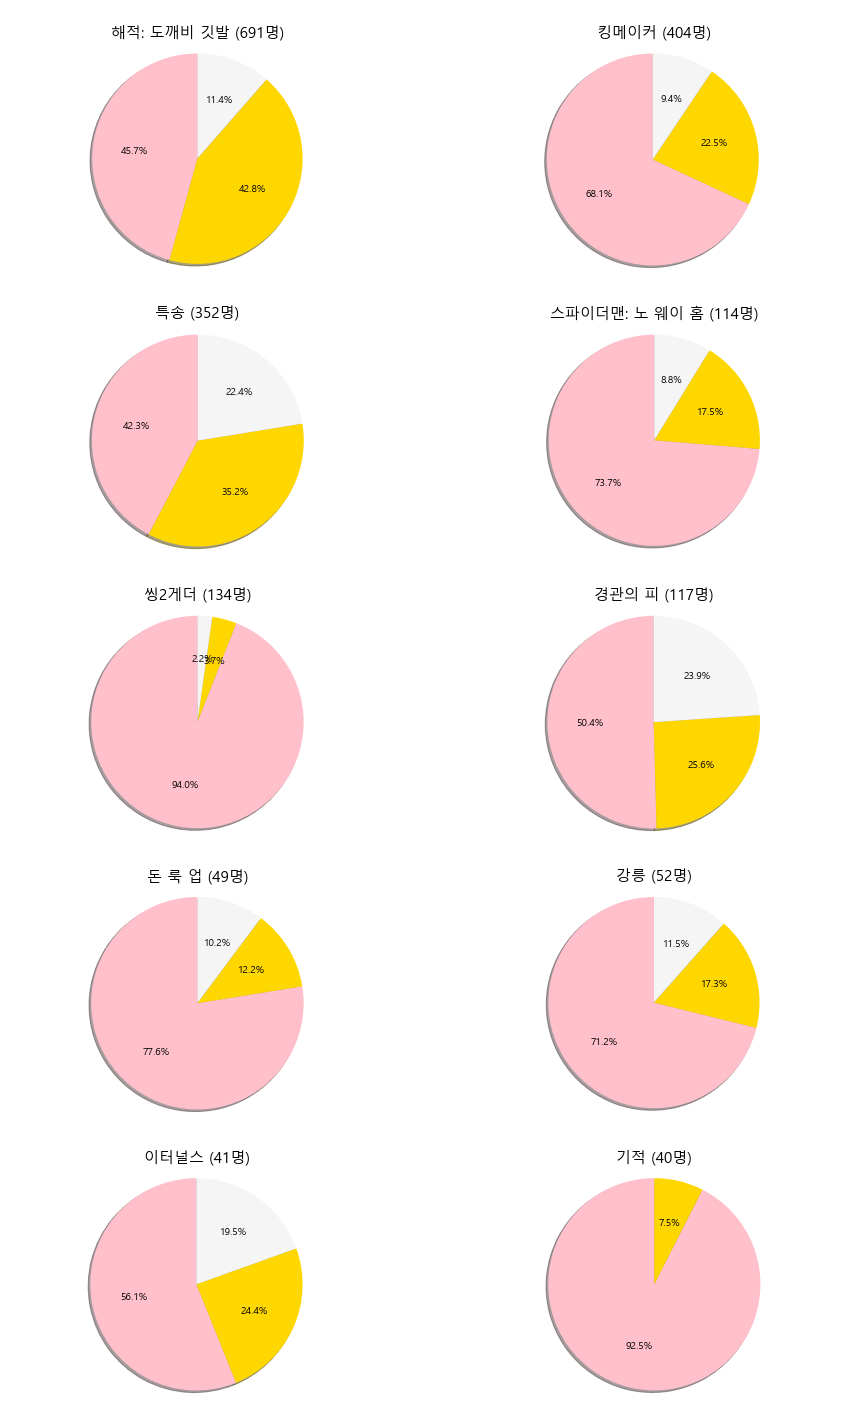

In [14]:
import math
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
axs = axs.flatten()
colors = ['pink', 'gold', 'whitesmoke']
labels=['1 (8~10점)', '0 (1~4점)', '2 (5~7점)']

for title,ax in zip(avg_score.keys(), axs):   
    num_reviews = len(top10_reviews[top10_reviews['title'] == title])
    values = top10_reviews[top10_reviews['title'] == title]['label'].value_counts()
    ax.set_title('\n%s (%d명)' % (title, num_reviews) , fontsize=15) 
    ax.pie(values, 
           autopct='%1.1f%%', 
           #explode=[0.1, 0, 0], 
           #labels=labels, 
           colors=colors, 
           shadow=True, 
           startangle=90)   
    ax.axis('equal') 
plt.show()

# 3. 텍스트 빈도 분석 + 워드클라우드

## 3.1 긍정 / 부정 리뷰의 키워드 분석하기

### 3.1.1 긍정/부정 리뷰 추출하기

In [ ]:
# import sys
# print('python version:', sys.version)
# Java JDK 설치
# Java 환경변수 Path 설정
# !pip install --upgrade pip 
# !pip install JPype1-1.1.2-cp39-cp39-win_amd64.whl 경로
# !pip install konlpy

In [15]:
# 결측치와 중복이 제거된 데이터 셋
df_reviews 

,title,score,comment,label
0,샹치와 텐 링즈의 전설,5,어머니와 아버지가 죽는걸 보고만 있는 방관자 샹치,2
2,해적: 도깨비 깃발,6,그냥 뭐.. 저냥 뭐... 유쾌한 영화로 보이기 위한 노력?,2
3,카고,10,호러와 아기의 귀여움을 동시에 보게 해준 감독 천재ㅋㅋ,1
4,해적: 도깨비 깃발,2,이렇게 영화를 못 만들수 있구나 라는 생각과 발연기가 무엇인지 제대로 보여 준 영화,0
5,해적: 도깨비 깃발,4,"CG 때문에 별 두개줌. 모든게 불호였으나, 마지막 파도씬은 끝내주더라!",0
...,...,...,...,...
4995,블러드 레드 스카이,1,애새끼 존나 짜증남 고혈압에 뒷목잡음 지가 일벌려놓고 수습안되니까 엄마 찾으면서 징징댐,0
4996,인비저블 게스트,8,사건은 쉬운데 연기력이 좋으셔들 부모님들의 감정에 많이 공감되었다,1
4997,인질,6,"황정민 아니였으면 어쩔뻔했나, 다른 배우들 연기력 아니면 어쩔뻔했나, 시간가는줄 알...",2
4998,스파이더맨: 노 웨이 홈,9,예전이나 지금이나 스파이더맨은 그대로네요,1


In [16]:
pos_reviews = df_reviews[df_reviews['label'] == 1]
neg_reviews = df_reviews[df_reviews['label'] == 0]

### 3.1.2  한글 이외의 문자 제거하기

In [17]:
import re
# 긍정 리뷰
pos_reviews['comment'] = pos_reviews['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))
#  부정 리뷰
neg_reviews['comment'] = neg_reviews['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

### 3.1.3 한글 형태소 분석: KoNLPy 이용

In [18]:
# 리뷰(comment)에서 명사만 추출
import jpype
from konlpy.tag import Okt
okt = Okt()

pos_comment_nouns = []
for cmt in pos_reviews['comment']:
    pos_comment_nouns.extend(okt.nouns(cmt)) 

In [19]:
# 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
pos_comment_nouns2 = []
word = [w for w in pos_comment_nouns if len(w) > 1]  
pos_comment_nouns2.extend(word)   

In [20]:
pos_comment_nouns2

['호러',
 '아기',
 '동시',
 '감독',
 '천재',
 '연기력',
 '미장센',
 '편집',
 '연출',
 '매력',
 '조금',
 '깊이',
 '주제',
 '명작',
 '흥미진진',
 '대중',
 '노선',
 '택한듯',
 '무엇',
 '하리',
 '인생',
 '최고',
 '명작',
 '에일리',
 '언스',
 '무엇',
 '정의',
 '그것',
 '국민',
 '진정',
 '정의',
 '는걸',
 '영화',
 '모든',
 '캐릭터',
 '의미',
 '여지',
 '마블',
 '영화',
 '제일',
 '엊그제',
 '보고',
 '오늘',
 '후기',
 '여운',
 '당시',
 '배경',
 '사실',
 '묘사',
 '더욱',
 '감정이입',
 '실험',
 '연출',
 '생각',
 '정말',
 '표현',
 '당시',
 '비극',
 '사실',
 '표현',
 '더욱',
 '몰입',
 '위안부',
 '문제',
 '하루',
 '해결',
 '기원',
 '사명',
 '생각',
 '기억',
 '완전',
 '뮤지컬',
 '웹드',
 '화면',
 '더더',
 '더더',
 '더더',
 '시즌',
 '소취',
 '덤블도어',
 '호그와트',
 '알기',
 '최애',
 '화보',
 '조진웅',
 '우리나라',
 '배우',
 '자체',
 '완전',
 '감동',
 '수트',
 '손가락',
 '조진웅',
 '손가락',
 '왜캐',
 '나영',
 '결혼',
 '살아생전',
 '조진웅',
 '악수',
 '한번',
 '싶네욤',
 '최우식',
 '연출',
 '몰입',
 '스토리',
 '연출',
 '우려',
 '출연',
 '하나',
 '부족함',
 '영화',
 '전이',
 '세월',
 '제작',
 '영화',
 '그냥',
 '눈물',
 '콧물',
 '진짜',
 '영화',
 '사람',
 '판타지',
 '그림자',
 '이유',
 '그림자',
 '최고',
 '미스터',
 '시간',
 '자동차',
 '액션씬',
 '장난',
 '약간',
 '장면',
 '꿀잼',
 '연우진',
 '배우',
 '발음'

### 3.1.4  단어 빈도 탐색

In [21]:
from collections import Counter
pos_word_count = Counter(pos_comment_nouns2)

In [22]:
pos_word_count

Counter({'호러': 3,
         '아기': 6,
         '동시': 13,
         '감독': 70,
         '천재': 9,
         '연기력': 60,
         '미장센': 1,
         '편집': 7,
         '연출': 180,
         '매력': 42,
         '조금': 39,
         '깊이': 11,
         '주제': 10,
         '명작': 71,
         '흥미진진': 15,
         '대중': 8,
         '노선': 1,
         '택한듯': 1,
         '무엇': 27,
         '하리': 1,
         '인생': 113,
         '최고': 194,
         '에일리': 1,
         '언스': 1,
         '정의': 10,
         '그것': 24,
         '국민': 15,
         '진정': 10,
         '는걸': 4,
         '영화': 1364,
         '모든': 52,
         '캐릭터': 40,
         '의미': 17,
         '여지': 1,
         '마블': 27,
         '제일': 25,
         '엊그제': 1,
         '보고': 165,
         '오늘': 16,
         '후기': 11,
         '여운': 42,
         '당시': 18,
         '배경': 17,
         '사실': 35,
         '묘사': 8,
         '더욱': 16,
         '감정이입': 6,
         '실험': 1,
         '생각': 255,
         '정말': 197,
         '표현': 31,
         '비극': 11,
         '몰

In [23]:
max = 20
pos_top_20 = {}
for word, counts in pos_word_count.most_common(max):
    pos_top_20[word] = counts
    print(f'{word} : {counts}')

영화 : 1364
연기 : 440
배우 : 273
생각 : 255
스토리 : 232
진짜 : 231
감동 : 200
정말 : 197
최고 : 194
연출 : 180
보고 : 165
사람 : 127
인생 : 113
평점 : 106
사랑 : 103
시간 : 101
다시 : 100
몰입 : 87
하나 : 83
그냥 : 82


## 3.2 텍스트 빈도 시각화 하기

### 3.2.1 빈도수가 높은 상위 20개의 단어로 그래프 그리기

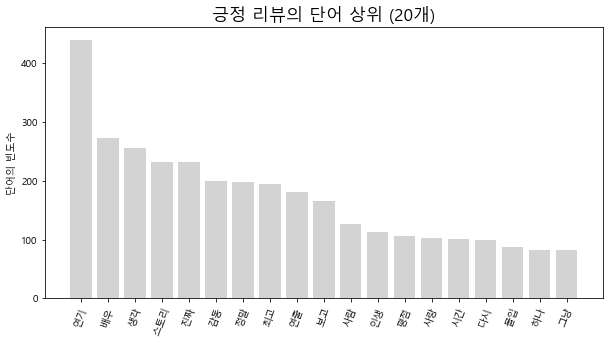

In [24]:
# 빈도수가 높은 상위 20개의 단어 이용하여 그래프 그리기
#max = 20
plt.figure(figsize=(10, 5))
plt.title('긍정 리뷰의 단어 상위 (%d개)' % max, fontsize=17)    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in pos_top_20.items():
    if key == '영화': continue
    plt.bar(key, value, color='lightgrey') 
plt.show()

### 부정 리뷰 감성분석

영화 : 535
연기 : 138
스토리 : 119
배우 : 118
진짜 : 112
감독 : 83
시간 : 72
그냥 : 70
평점 : 59
정말 : 59
한효주 : 58
생각 : 54
최악 : 54
사람 : 52
노잼 : 50
연출 : 50
처음 : 48
내용 : 48
느낌 : 46
재미 : 46


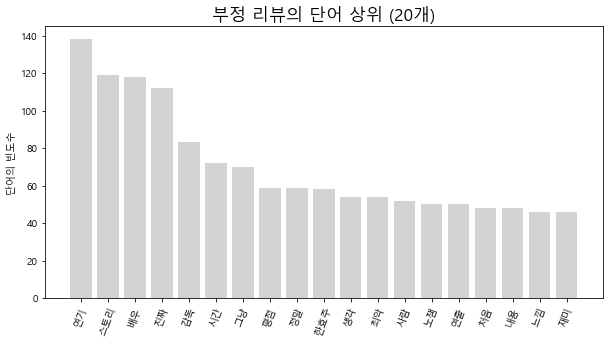

In [25]:
# 리뷰(comment)에서 명사만 추출
neg_comment_nouns = []
for cmt in neg_reviews['comment']:
    neg_comment_nouns.extend(okt.nouns(cmt)) 

# 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
neg_comment_nouns2 = []
word = [w for w in neg_comment_nouns if len(w) > 1]  
neg_comment_nouns2.extend(word)  
    
# 단어의 빈도 계산
neg_word_count = Counter(neg_comment_nouns2)

# 빈도수가 많은 상위 20개의 단어 추출
neg_top_20 = {}
for word, counts in neg_word_count.most_common(max):
    neg_top_20[word] = counts
    print(f'{word} : {counts}')

# 빈도수가 높은 상위 20개의 단어 이용하여 그래프 그리기
# max = 20
plt.figure(figsize=(10, 5))
plt.title('부정 리뷰의 단어 상위 (%d개)' % max, fontsize=17)    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in neg_top_20.items():
    if key == '영화': continue
    plt.bar(key, value, color='lightgrey') 
plt.show()

### 3.2.2. 워드클라우드 그리기

In [ ]:
# !pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl 경로
# !pip install wordcloud

In [26]:
from wordcloud import WordCloud

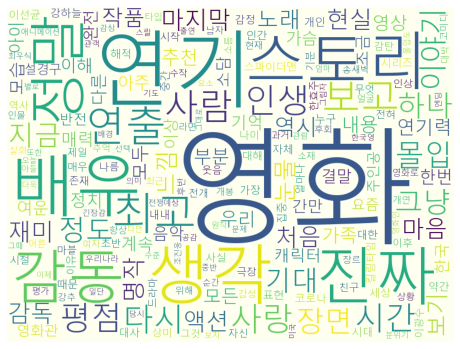

In [27]:
# 긍정 리뷰 워드클라우드
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(pos_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

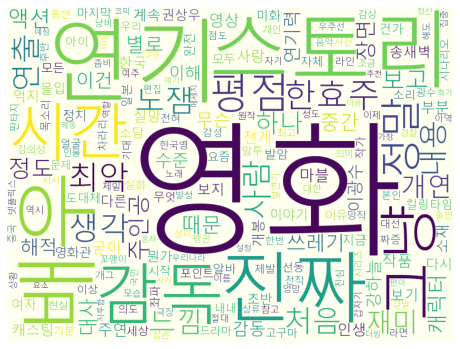

In [28]:
# 부정 리뷰 워드클라우드
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(neg_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()